# Add thư viện

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, recall_score
from keras.models import load_model
from keras.utils import plot_model
from keras.callbacks import TensorBoard
from time import time
import datetime

# Load dữ liệu
Bộ dữ liệu MIT-BIH 


In [4]:
#df_train = pd.read_csv("/Users/vibuitruong/Desktop/LV_2020/model/TRAIN_DATA_284_loc.csv", header=None)
#df_train = df_train.sample(frac=1)
df_test = pd.read_csv("/Users/vibuitruong/Desktop/LV_2020/model/TEST_DATA_284_loc.csv", header=None)

#Y = np.array(df_train[284].values).astype(np.int8)
#X = np.array(df_train[list(range(284))].values)[..., np.newaxis]

Y_test = np.array(df_test[284].values).astype(np.int8)
X_test = np.array(df_test[list(range(284))].values)[..., np.newaxis]

# Xây dựng mô hình CNN:

In [15]:
def get_model():
    ntype = 7
    X = Input(shape=(284, 1))
    X = Convolution1D(16, kernel_size=15, activation=activations.relu, padding="valid")(X)
    X = Convolution1D(16, kernel_size=15, activation=activations.relu, padding="valid")(X)
    X = MaxPool1D(pool_size=3)(X)
    X = Dropout(rate=0.1)(X)
    X = Convolution1D(16, kernel_size=10, activation=activations.relu, padding="valid")(X)
    X = Convolution1D(16, kernel_size=10, activation=activations.relu, padding="valid")(X)
    X = MaxPool1D(pool_size=2)(X)
    X = Dropout(rate=0.1)(X)
    X = Convolution1D(32, kernel_size=5, activation=activations.relu, padding="valid")(X)
    X = Convolution1D(32, kernel_size=5, activation=activations.relu, padding="valid")(X)
    X = MaxPool1D(pool_size=2)(X)
    X = Dropout(rate=0.1)(X)
    X = Convolution1D(256, kernel_size=1, activation=activations.relu, padding="valid")(X)
    X = Convolution1D(256, kernel_size=1, activation=activations.relu, padding="valid")(X)
    X = GlobalMaxPool1D()(X)
    X = Dropout(rate=0.2)(X)

    dense_1 = Dense(128, activation=activations.relu, name="dense_1")(X)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(ntype, activation=activations.softmax, name="dense_3_mitbih")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model
model = get_model()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 284, 1)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 270, 16)           256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 256, 16)           3856      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 85, 16)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 85, 16)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 76, 16)            2576      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 67, 16)            2576

# Thực hiện Trainning

In [16]:
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
opt = optimizers.Adam(0.001)

model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
file_path = "VGG_284_loc_2.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=5, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

h=model.fit(X, Y, epochs=100, batch_size=1000, verbose=1, callbacks=callbacks_list, validation_split=0.2)
model.load_weights(file_path)

Train on 64253 samples, validate on 16064 samples
Epoch 1/100
64253/64253 [==============================] - 31s 485us/step - loss: 1.1916 - acc: 0.6387 - val_loss: 0.8827 - val_acc: 0.6495

Epoch 00001: val_acc improved from -inf to 0.64946, saving model to VGG_284_loc_2.h5
Epoch 2/100
64253/64253 [==============================] - 30s 468us/step - loss: 0.7364 - acc: 0.7302 - val_loss: 0.5586 - val_acc: 0.8266

Epoch 00002: val_acc improved from 0.64946 to 0.82657, saving model to VGG_284_loc_2.h5
Epoch 3/100
64253/64253 [==============================] - 30s 463us/step - loss: 0.5071 - acc: 0.8397 - val_loss: 0.3686 - val_acc: 0.9026

Epoch 00003: val_acc improved from 0.82657 to 0.90258, saving model to VGG_284_loc_2.h5
Epoch 4/100
64253/64253 [==============================] - 30s 462us/step - loss: 0.3563 - acc: 0.8981 - val_loss: 0.2502 - val_acc: 0.9318

Epoch 00004: val_acc improved from 0.90258 to 0.93177, saving model to VGG_284_loc_2.h5
Epoch 5/100
64253/64253 [============

# Vẽ đồ thị acc & loss

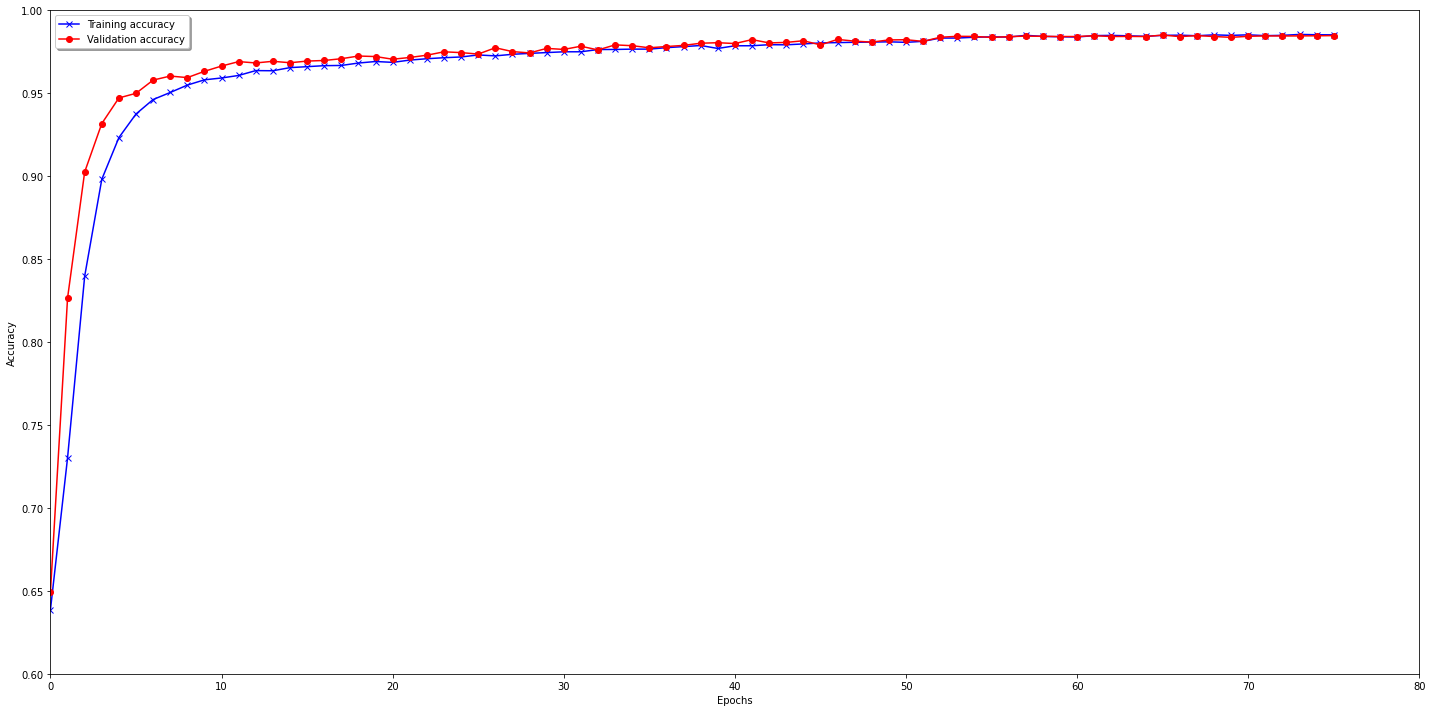

In [17]:
'''fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
ax1.plot(h.history['loss'], 'x-',color='b', label="Training loss")
ax1.plot(h.history['val_loss'], 'o-',color='r', label="validation loss")
ax1.set_xticks(np.arange(0, 50, 5))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(h.history['acc'], 'x-',color='b', label="Training accuracy")
ax2.plot(h.history['val_acc'], 'o-',color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(0, 50, 10))


legend = plt.legend(loc='best', shadow=True)'''
plt.figure(figsize=(20, 10))
plt.plot(h.history['acc'], 'x-',color='b', label="Training accuracy")
plt.plot(h.history['val_acc'], 'o-',color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,80)
plt.ylim(0.6,1)

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

hist_df = pd.DataFrame(h.history) 
# or save to csv: 
hist_csv_file = 'history_VGGNet.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

# Load model

In [7]:
model = load_model('VGG_284_final.h5',custom_objects=None, compile=False)

# Dự đoán

In [10]:
pred_test = model.predict(X_test,verbose=1)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)
recall = recall_score(Y_test, pred_test, average="macro")
print("Test accuracy score : %s "% acc)
print("Recall : %s "% recall)

20076/20076 [==============================] - 5s 252us/step
Test f1 score : 0.9813343657139387 
Test accuracy score : 0.9925782028292488 
Recall : 0.9777358028812687 


# Kết quả dự đoán

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13007
           1       1.00      1.00      1.00      1514
           2       1.00      1.00      1.00      1446
           3       0.96      0.92      0.94       500
           4       0.99      0.99      0.99      1244
           5       1.00      1.00      1.00      1388
           6       0.96      0.95      0.95       977

    accuracy                           0.99     20076
   macro avg       0.99      0.98      0.98     20076
weighted avg       0.99      0.99      0.99     20076

Confusion matrix
[[12972     1     1    11     3     0    19]
 [    0  1514     0     0     0     0     0]
 [    0     0  1445     1     0     0     0]
 [   35     0     0   458     0     0     7]
 [    4     0     0     0  1229     0    11]
 [    0     0     0     0     0  1385     3]
 [   28     0     0     7    14     4   924]]


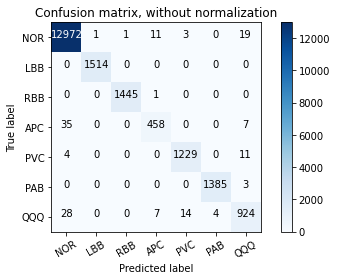

In [27]:
c=confusion_matrix(Y_test,pred_test)
print('Classification Report')
print(classification_report(Y_test, pred_test))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    print('Confusion matrix')
    print(cm)
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(c, classes=['NOR', 'LBB', 'RBB', 'APC', 'PVC', 'PAB', 'QQQ'],
                      title='Confusion matrix, without normalization')

# Vẽ random 20 nhịp được dự đoán

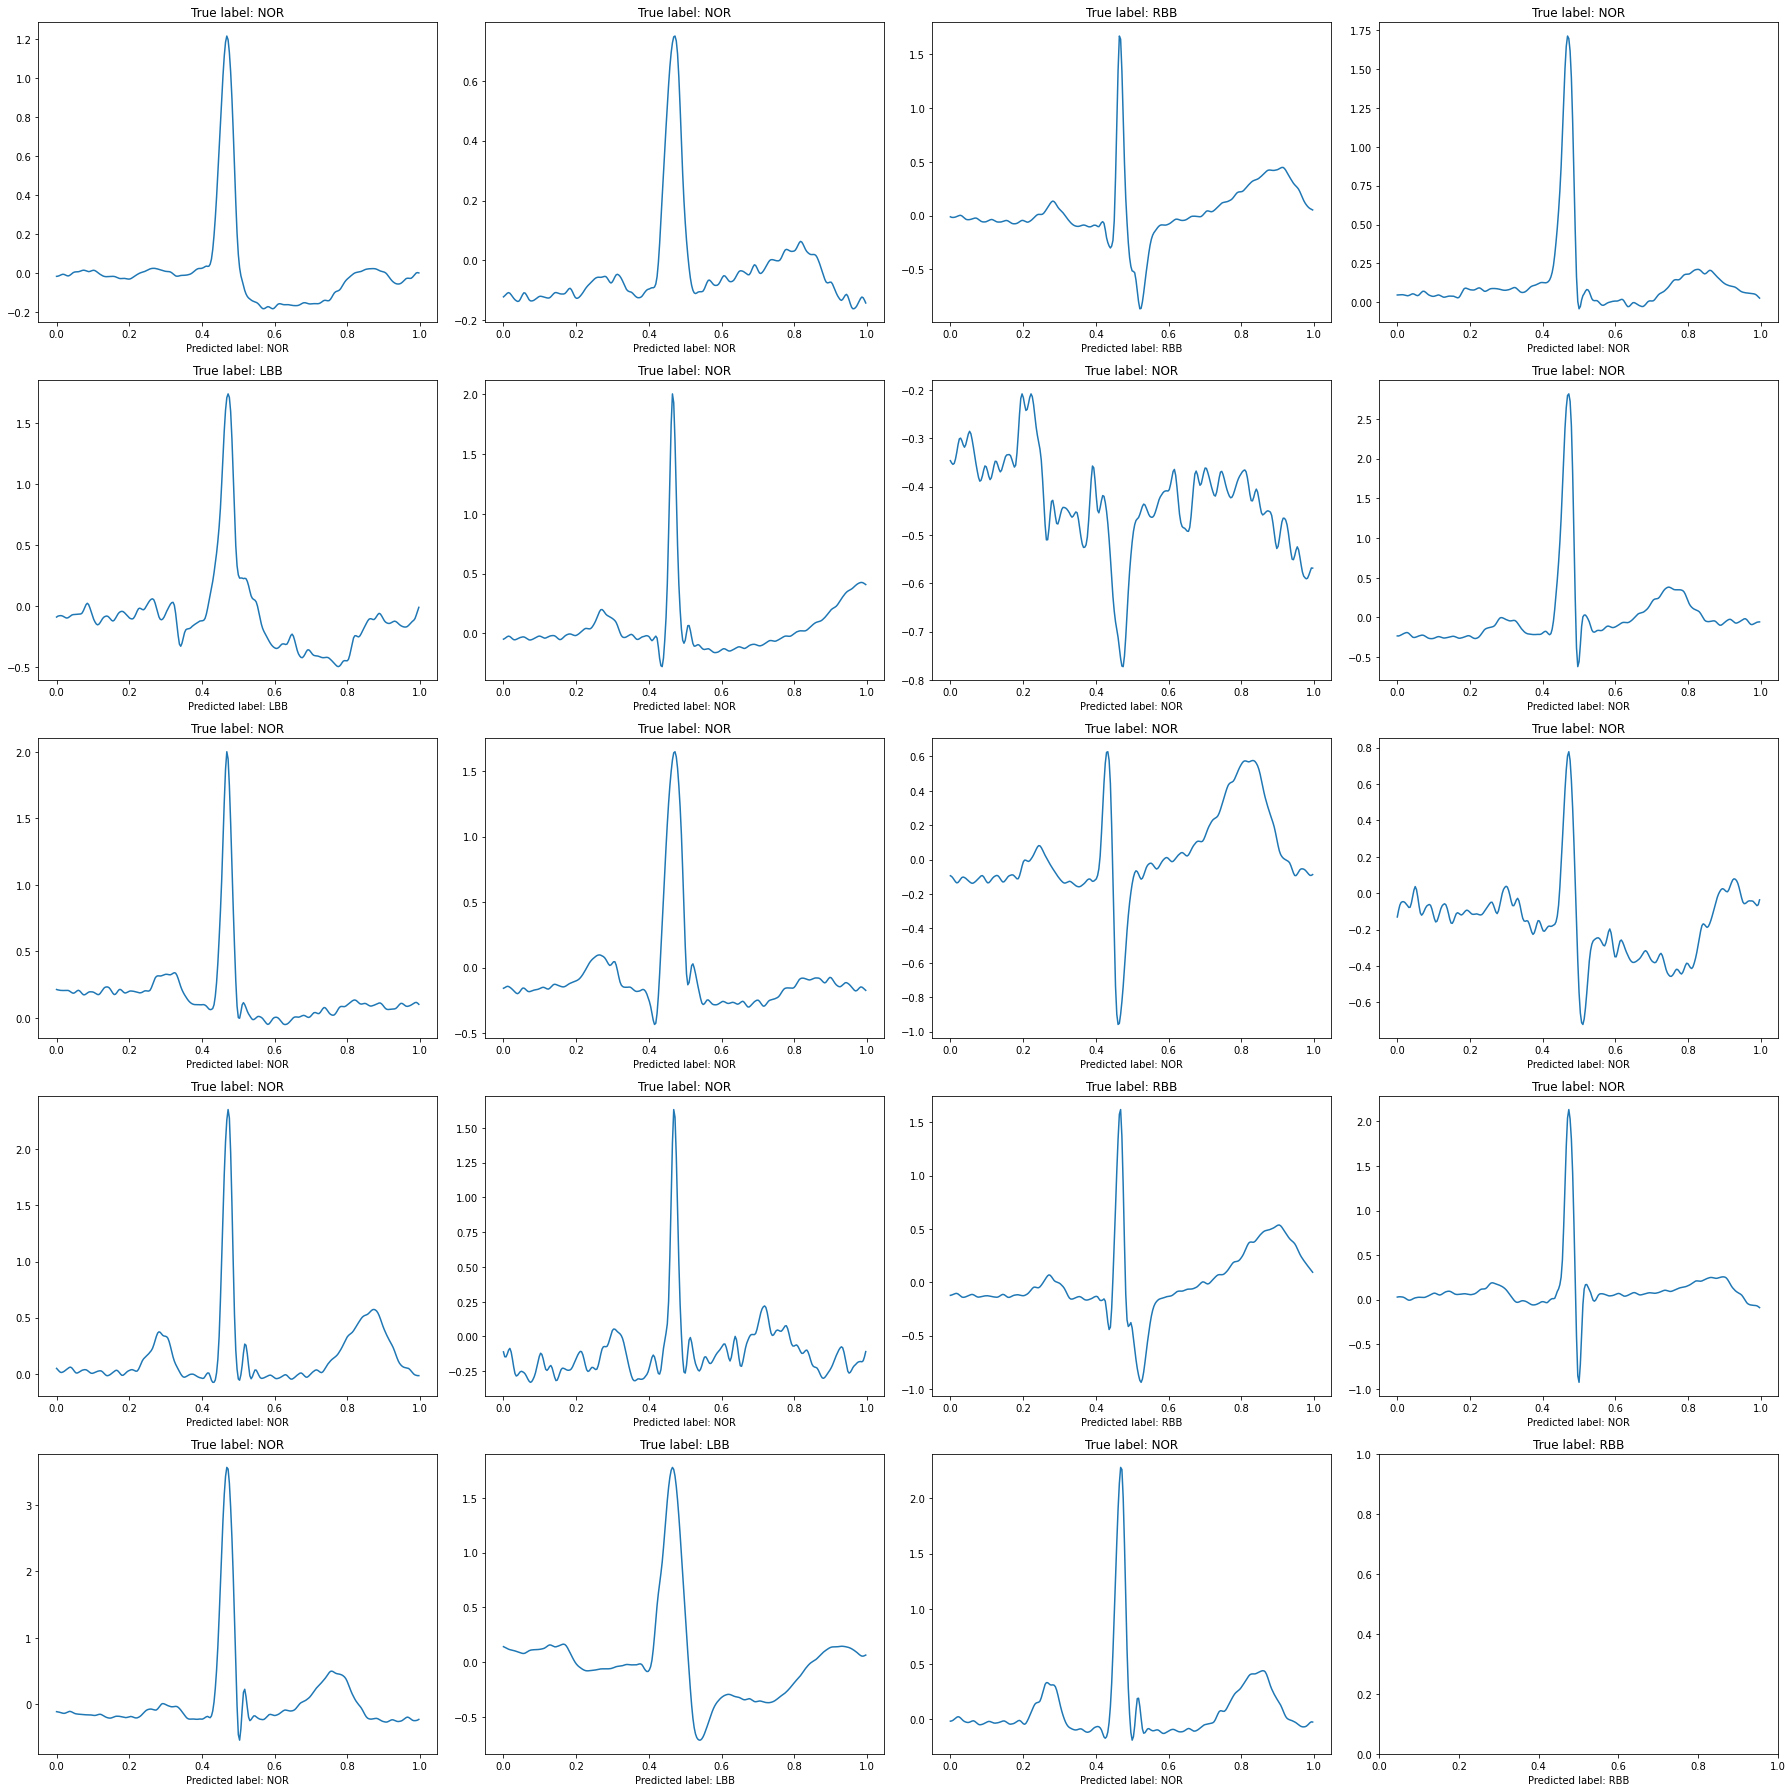

In [21]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
True_Label=list()
Pred_Label=list()
i=np.random.randint(1555,15540,20)
#i=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
t=np.arange(0,284)
ts=t/284
for j in range(len(i)):
    if Y_test[i[j]]==0:
        True_Label.append('NOR')
    elif Y_test[i[j]]==1:
        True_Label.append('LBB')
    elif Y_test[i[j]]==2:
        True_Label.append('RBB')
    elif Y_test[i[j]]==3:
        True_Label.append('APC')
    elif Y_test[i[j]]==4:
        True_Label.append('PVC')
    elif Y_test[i[j]]==5:
        True_Label.append('PAB')
    elif Y_test[i[j]]==6:
        True_Label.append('QQQ')
for j in range(len(i)):
    if pred_test[i[j]]==0:
        Pred_Label.append('NOR')
    elif pred_test[i[j]]==1:
        Pred_Label.append('LBB')
    elif pred_test[i[j]]==2:
        Pred_Label.append('RBB')
    elif pred_test[i[j]]==3:
        Pred_Label.append('APC')
    elif pred_test[i[j]]==4:
        Pred_Label.append('PVC')
    elif pred_test[i[j]]==5:
        Pred_Label.append('PAB')
    elif pred_test[i[j]]==6:
        Pred_Label.append('QQQ')
for j in range(len(i)):
    plt.plot(ts,X_test[i[j-1]])
    plt.subplot(5, 4, j+1)
    plt.xlabel('Predicted label: '+ Pred_Label[j])
    plt.title('True label: '+ True_Label[j])
plt.tight_layout()
plt.show()